# Cmpe548 HW2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Q1

In order to estimate the are, I estimated the are on the positive orthant and multiplied it by 4 since the area in the other orthants are symmetric. I used 2-norm unit ball as IS distribution to sample from the target distribution of 0.5-norm ball.

Area estimated:  0.667293398838


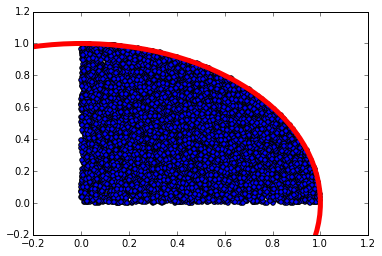

In [2]:
def p(x):
    p=0.5
    return np.power((1-np.power(np.abs(x), p)), 1./p)


def q(x):
    return np.sqrt(1-np.square(x))


def sample_from_unit_circle(N):
    """ Q1 """
    # Generate samples from Theta and R
    # By the inversion rule, u=F(r) and r=sqrt(u), u is in [0,1]
    # N=10000 #Number of samples to generate
    r = np.sqrt(np.random.rand(N))
    theta = np.random.rand(N) * np.pi / 2.

    # Convert (r,theta) to cartesian coordinates
    x = r * np.sin(theta)
    y = r * np.cos(theta)

    plt.figure()
    # Plot the sample points
    plt.scatter(x, y)

    # Plot the unit circle
    unit_circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=5)
    fig = plt.gcf()
    fig.gca().add_artist(unit_circle)
    #plt.show()

    return x, y

N = int(1e4)

# Generate points from 1-norm unit ball in 2D
x, y = sample_from_unit_circle(N)


w = np.array(map(lambda a: 1./q(a), x))

area_est = 4 * np.dot(w, np.array(map(p, x)))/np.sum(w)

print 'Area estimated: ',area_est

# Q2

## Q2.a

In [4]:
# Transition matrix
A = np.array([
    [0.25,  0.25,   0.25,   0.25,   0.25,   0.25],
    [0,     0.25,   0,      0,      0.25,   0],
    [0,     0,      0,      0.50,   0,      0],
    [0.25,  0.25,   0.50,   0,      0.25,   0.25],
    [0.25,  0.25,   0.25,   0.25,   0.25,   0.25],
    [0.25,  0,      0,      0,      0,      0.25]
]);

## Q2.b

The stationary distribution of a markov chain is the normalized eigenvector of the transition matrix, corresponding to the eigenvalue $\lambda=1$. The result shows that the stationary distribution is not uniform.

In [6]:
w, v = np.linalg.eig(A)
i = np.argmax(np.isclose(w, 1.0))
pi = v[:, i]
pi = pi / sum(pi)
print 'Stationary distribution by eigenvector: \n', pi

Stationary distribution by eigenvector: 
[ 0.25        0.08333333  0.11111111  0.22222222  0.25        0.08333333]


## Q2.c 

Detailed balance condition is defined as $P_{ji}\pi_i = P_{ij} \pi_j$

In [7]:
x = np.dot(A, pi)
# x.T is the same as x.transpose(). Direction should not matter when stationary distribution is reached
print 'Is detailed balance satisfied?: ', np.isclose(x, x.transpose()).all()

Is detailed balance satisfied?:  True


## Q2.d

In [8]:
threshold = 1e-8
pi0 = np.array([1./6, 1./6, 1./6, 1./6, 1./6, 1./6, ])
T_mix = np.inf
for i in range(100):
    dist = sum(np.abs(np.dot(np.linalg.matrix_power(A, i), pi0) - pi))/2.
    if dist <= threshold:
        T_mix = i
        break

## Q2.e

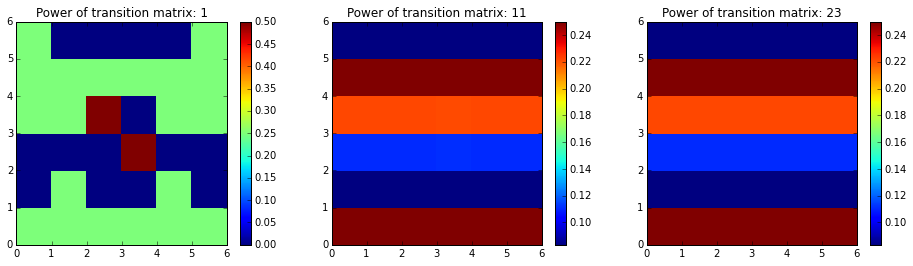

In [11]:
plt.figure(figsize=(16, 4))
for i, n in enumerate([1, T_mix/2, T_mix]):
    plt.subplot(1, 3, i+1)
    plt.pcolormesh(np.linalg.matrix_power(A, n))
    plt.title('Power of transition matrix: ' + str(n))
    plt.colorbar()

## Q2.f

<matplotlib.colorbar.Colorbar instance at 0x7f647f6dbc68>

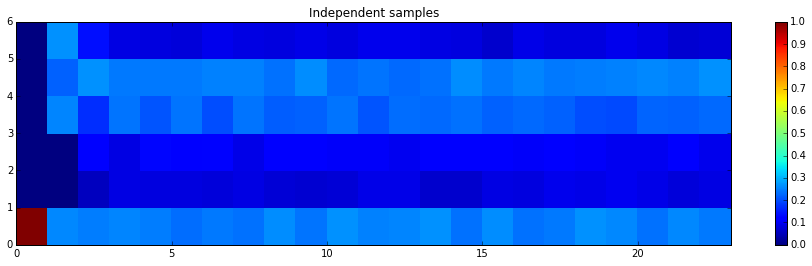

In [13]:
def simulate_mc(A, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0    # Number 1 is denoted as 0, 2 as 1 etc.
    for i in range(1, N):
        pr = A[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p=pr)

    return chain

N_chains = int(1e3)
samples = np.zeros((N_chains, T_mix))
for i in range(N_chains):
    samples[i,:] = simulate_mc(A, T_mix)

plt.figure(figsize=(16, 4))
column_histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=[0,1,2,3,4,5,6], density = True)[0], 0, samples)
plt.pcolormesh(column_histograms)
plt.title('Independent samples')
plt.axis('tight')
plt.colorbar()

## Q2.g

The result of the histogram is consistent with the values of the eigenvector which is the sationary distribution.

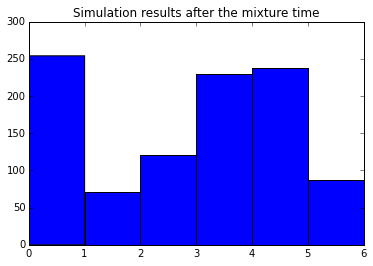

In [15]:
chain = simulate_mc(A, int(1e3)+T_mix)
plt.figure()
plt.hist(chain[T_mix:], bins=[0,1,2,3,4,5,6])
plt.title('Simulation results after the mixture time')